Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Athithian Selvadurai"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


**Write Up/Assignment 2 Solution**

**Question 1.**

The categories of passengers who were most likely to survive the titanic were females, young people, first class passengers, people travelling by themselves, and people who boarded in Cherbourg. After cleaning my data and focusing on these key attributes I found that females on board had a survival rate of 74.2%, first class passengers had a survival rate of 63.0%, solo travelers had a 50.6% survival rate and young passengers (ages 0-16) had a 55.0% survival rate. Also passengers who boarded in Cherbourg had a 55.3% survival rate. Looking at the two largest survival rates, it is clear to say that the most likeley category of passengers to survive were females in first class, and behind them children, likely also in first class. This holds true with initial expectations, after all "women and children first" and first class passengers likely had priority access the life boats.  

**Question 2.**

The other categories that I looked at were embarked, family (which is created attribute combining Parch and SibSp), Solo which was drawn from the family attribute, and AgeRange which was the age data seperated into ranges. The reason I looked at these categories as well was because I felt that they were both unique enough to show something the other categories couldn't as well as having possible correlations. For example the location where passengers embarked is unique as it breaks the passengers into weighted groups, and the explanation for why C has such a high survival rate is likely because it was the smallest sample size i.e the port the fewest people boarded at. Small families and Solo travelers likely had higher survival rates because they had to look out for a smaller group of people, and solo travellers only had to take care of themselves meaning there were no delays in getting to a lifeboat or nothing holding them back from boarding (families might not want to split themselves). 

Complete List: Survived, Pclass, Sex, Age, Embarked, Family, AgeRange, Solo

**Question 3.**

I did create the Family attribute because there was little to no overlap in the Parch and SibSp categories and felt that I could combine them under the Family banner to make the dataframe cleaner and more effecient. It also was an useful step towards splitting the section into solo travellers which did show a useful correlation. I created the AgeRange to split up the ages into reasonable ranges, easier to see the pattern in and display. 

Categories I dropped:

Cabin: 

Cabin had far too many missing data to replace/ignore and I felt the attribute wasn't useful for 3 reasons. Firstly there is not a clear way to me to accurately and quickly fill in the missing data. The second reason I will drop it, and also the reason im not worried about fixing it is that at the time of the sinking, we can't guarantee that each passenger was in their cabin and since a likely factor in survival was your position at the time of the Titanic sinking, the info isnt useful and has too many gaps, e.g a person who has a cabin near a lifeboat might have been at the bottom of the boat there are too many variables. Lastly cabin placement is very tied to your passenger class, and since we have a full dataset for Pclass, any correlations we could make from Cabin, if any, can be extrapolated from there. 

Fare:

Fare was most definetely related to the ticket class, and since I was already looking at Pclass, I felt any relationship I would see in fare paid would be a reflection of information I would get from Pclass. 

Ticket/Name/PassengerId:

All of these attributes are individual identifiers and would not have had any real effect on the survivability of the passengers. I did consider the idea mentioned in the webinar about taking the titles out of the names, however I felt that the information that titles would provide would likely overlap with our Pclass, sex and age (e.g a Dr is likely an first class older male or female) and similariy to my reasoning to dropping Fare, felt it fine to drop Name entirely

**Question 4.** 

For missing values there were 3 cases: Age, Cabin and Embarked. As mentioned above Cabin had the largest amount of missing data and was not useful so we excluded it from consideration. Embarked had only 2 missing values, so out of the 891 passengers felt it appropriate to assume they boarded at the most common port and used mode() to identify that as the S port. For age however I knew that it would be a very important variable to consider so looking at the other columns, that have 891 values and are therefore complete, the best categories to use are Sex and Pclass as its most likely that those will have an effect on what their age will be, and will therefore be a good predictor. By using both, I can seperate Age into 6 subcategories, which will make filling their null spots with the median result in as accurate of a data set I can work with. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv', sep = ',')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Age, which is surely going to be an important factor in our analysis has too many missing data values, so we need to clean it. Looking at the other columns, that have 891 values and are therefore complete, the best categories to use are Sex and Pclass as its most likely that those will have an effect on what their age will be, and will therefore be a good predictor. By using both, I can group into 6 subcategories, which will make filling their null spots with the median result in a more accurate data set to work with. 

In [6]:
train_groups = train.groupby(['Sex', 'Pclass'])['Age'].median()
print(train_groups)

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [7]:
def nullAgeAdjust(train):
    for i in range(len(train)):
        if pd.isnull(train.loc[i, "Age"]): #If we have a null value identify the category and replace with our median
            if train.loc[i, 'Sex'] == 'female' and train.loc[i, 'Pclass'] == 1:
                train.loc[i, 'Age'] = 35
            elif train.loc[i, 'Sex'] == 'female' and train.loc[i, 'Pclass'] == 2:
                train.loc[i, 'Age'] = 28
            elif train.loc[i, 'Sex'] == 'female' and train.loc[i, 'Pclass'] == 3:
                train.loc[i, 'Age'] = 22
            elif train.loc[i, 'Sex'] == 'male' and train.loc[i, 'Pclass'] == 1:
                train.loc[i, 'Age'] = 40
            elif train.loc[i, 'Sex'] == 'male' and train.loc[i, 'Pclass'] == 2:
                train.loc[i, 'Age'] = 30
            elif train.loc[i, 'Sex'] == 'male' and train.loc[i, 'Pclass'] == 3:
                train.loc[i, 'Age'] = 25
    return train            

In [8]:
train_copy = nullAgeAdjust(train)

In [9]:
train_copy.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Embarked has only 2 missing values, and considering what kind of values you can have for embarked it makes the most sense to replace the null values with the mode value. 

In [11]:
train_copy.Embarked.mode()

0    S
dtype: object

In [12]:
train_copy['Embarked'] = train_copy['Embarked'].fillna('S')

In [13]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [14]:
train_copy[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


We now see that Mr. James Moran now has an age value assigned to him and confirmed that there are no null values in Age anymore. The other data column with a worrying amount of null data would be Cabin. However I am going to drop the Cabin column for 3 reasons. Firstly there is not a clear way to me to accurately and quickly fill in the missing data. The second reason I will drop it, and also the reason im not worried about fixing it is that at the time of the sinking, we can't guarantee that each passenger was in their cabin and since a likely factor in survival was your position at the time of the Titanic sinking, the info isnt useful and has too many gaps, e.g a person who has a cabin near a lifeboat might have been at the bottom of the boat there are too many variables. Lastly cabin placement is very tied to your passenger class, and since we have a full dataset for Pclass, any correlations we could make from Cabin, if any, can be extrapolated from there. 

In [15]:
train_copy = train_copy.drop('Cabin', axis = 1)

#only reason i had a keyerror here is i ran it twice code is fine

In [16]:
train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


We're also going to drop the Ticket data, and the PassengerID as neither are likely to correlate to survival compared to our other values. 

In [17]:
train_copy = train_copy.drop('Ticket', axis = 1)
train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [18]:
train_copy = train_copy.drop('PassengerId', axis = 1)
train_copy

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Let's anaylze our leftover data now that its a bit cleaner. Likely factors in someone's survivability would be their Sex (females), Age (children) and their Pclass (1). Let's test this hypothesis

In [19]:
#Pclass
train_copy[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1st class passengers were more likely to have survived

In [20]:
#Sex
train_copy[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Females are clearly more likely to have survived

In [21]:
train_copy['Family'] = train_copy['SibSp'] + train_copy['Parch']



In [22]:
train_copy['Solo'] = 0
train_copy.loc[train_copy['Family'] == 0, 'Solo'] = 1

train_copy[['Solo', 'Survived']].groupby(['Solo'], as_index=False).mean()

,Solo,Survived
0,0,0.505650
1,1,0.303538


In [23]:
train_copy = train_copy.drop('SibSp', axis = 1)
train_copy

,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Family,Solo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,13.0000,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,30.0000,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,2,23.4500,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,30.0000,C,0,1


In [24]:
train_copy = train_copy.drop('Parch', axis = 1)
train_copy

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Solo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,23.4500,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,0,1


In [25]:
train_copy[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [26]:
train_copy = train_copy.drop('Name', axis = 1)
train_copy

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Solo
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,0
2,1,3,female,26.0,7.9250,S,0,1
3,1,1,female,35.0,53.1000,S,1,0
4,0,3,male,35.0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,1
887,1,1,female,19.0,30.0000,S,0,1
888,0,3,female,22.0,23.4500,S,3,0
889,1,1,male,26.0,30.0000,C,0,1


I did consider the idea mentioned in the webinar about taking the titles out of the names, however I felt that the information that titles would provide would likely overlap with our Pclass, sex and age (e.g a Dr is likely an first class older male or female) and felt it fine to drop Name entirely

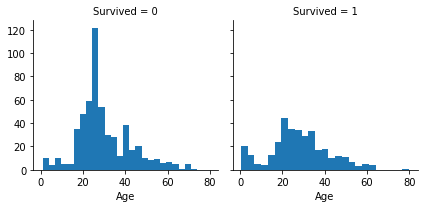

In [27]:
ageplt = sns.FacetGrid(train_copy, col = 'Survived')
ageplt.map(plt.hist, 'Age', bins = 25)

In [28]:
train_copy['AgeRange'] = pd.cut(train_copy['Age'], 5)
train_copy[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [29]:
train_copy = train_copy.drop('Fare', axis = 1)
train_copy  #final

,Survived,Pclass,Sex,Age,Embarked,Family,Solo,AgeRange
0,0,3,male,22.0,S,1,0,"(16.336, 32.252]"
1,1,1,female,38.0,C,1,0,"(32.252, 48.168]"
2,1,3,female,26.0,S,0,1,"(16.336, 32.252]"
3,1,1,female,35.0,S,1,0,"(32.252, 48.168]"
4,0,3,male,35.0,S,0,1,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,0,1,"(16.336, 32.252]"
887,1,1,female,19.0,S,0,1,"(16.336, 32.252]"
888,0,3,female,22.0,S,3,0,"(16.336, 32.252]"
889,1,1,male,26.0,C,0,1,"(16.336, 32.252]"
